In [69]:
import requests
import json
import re
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import urllib.request 
%matplotlib inline
from datetime import datetime, date

In [5]:
def vk_api(method, **kwargs):
    api_request = 'https://api.vk.com/method/'+method + '?'
    api_request += '&'.join(['{}={}'.format(key, kwargs[key]) for key in kwargs])
    return json.loads(requests.get(api_request).text)

In [6]:
data = vk_api('wall.get', domain='meduzaproject')
data

{'response': [19492,
  {'attachment': {'link': {'description': 'Начался дачный сезон, а значит тысячи людей с рассадой отправились за город. Сотрудники «Медузы» поговорили о дачной жизни, поделились воспоминаниями о выходных на грядках — и поняли, что в самой идее «дачного отдыха» их многое не устраивает.',
     'image_big': 'https://pp.userapi.com/c638925/v638925046/41378/Zc_uzQp_-rM.jpg',
     'image_src': 'https://pp.userapi.com/c638925/v638925046/41376/OyCFQW8mN2I.jpg',
     'target': 'external',
     'title': 'За что мы ненавидим дачи? Объясняем на гифках из «Простоквашино» — Meduza',
     'url': 'https://meduza.io/slides/za-chto-my-nenavidim-dachi-ob-yasnyaem-na-gifkah-iz-prostokvashino'},
    'type': 'link'},
   'attachments': [{'link': {'description': 'Начался дачный сезон, а значит тысячи людей с рассадой отправились за город. Сотрудники «Медузы» поговорили о дачной жизни, поделились воспоминаниями о выходных на грядках — и поняли, что в самой идее «дачного отдыха» их многое н

In [7]:
group_info = vk_api('groups.getById', group_id='meduzaproject', v='5.63')
group_id = group_info['response'][0]['id']
group_id

76982440

In [81]:
posts = []
item_count = 200

result = vk_api('wall.get', owner_id=-group_id, v='5.63', count=100)
posts += result["response"]["items"]

while len(posts) < item_count:
    result = vk_api('wall.get', owner_id=-group_id, v='5.63', count=100, offset=len(posts))
    posts += result['response']["items"]
len(posts)


200

In [82]:
def get_comments(p_id):
    comments = []
    item_count = 200
    k = 101
    l = 102
    
    result = vk_api('wall.getComments', post_id=p_id, owner_id=-group_id, v='5.63', count=20)
    comments += result["response"]["items"]
   
    while len(comments) < item_count and k != l:
        k = len(comments)
        result = vk_api('wall.getComments', post_id=p_id, owner_id=-group_id, v='5.63', count=20, offset=len(comments))
        comments += result['response']["items"]
        l = len(comments)
        print(l)
    return comments

In [83]:
def get_age(bdate):
    
    today = datetime.today()  
    bdate = datetime.strptime(bdate, '%d.%m.%Y').date()
    
    age = today.year - bdate.year
    if today.month < bdate.month:
        age -= 1
    elif today.month == bdate.month and today.day < bdate.day:
        age -= 1
    return age

In [ ]:
len_data = {}

city_info = {}
bdate_info = {}

for post in posts:
    if not len(post['text']) in len_data:
        len_data[len(post['text'])] = []
        
    comments = get_comments(post['id'])
    
    for com in comments:
        l = len(com["text"])
        len_data[len(post['text'])].append(l)
        
        user_id = com["from_id"]            
        user_city = vk_api('users.get', user_ids=user_id, fields='city', v='5.63')
        user_bdate = vk_api('users.get', user_ids=user_id, fields='bdate', v='5.63')


        if 'city' in user_city['response'][0]:
            city = user_city['response'][0]["city"]["title"]   
            if 'city' in city_info:
                city_info[city].append(l)
            else:
                city_info[city] = [l]
                    
        if 'bdate' in user_bdate["response"][0]:
            bdate = user_bdate["response"][0]['bdate'] 
            
            if '1901' in bdate:
                print('off')
            else:
                match = re.search('[1-90]+\.[1-90]+\.[1-90]+', bdate)
            
            if match:
                age = get_age(bdate)
                if age in bdate_info:
                    bdate_info[age].append(l)
                else:
                    bdate_info[age] = [l]
                match = None

31
31
off
40
59
59
40
46
46
40
54
54
40
40
40
47
47
37
37
off
off
3
40
60
65
65
off
off
off
off
off
off
off
40
60
72
72
off
off
40
60
80
100
120
140
151
151
off
off
off
off
off
off
off
30
30
29
29
40
48
48
20
40
60
73
73
40
60
80
100
120
140
160
180
200
24
24
37
37
40
51
51
37
37
32
32
40
60
80
100
115
115
36
36
21
21
40
60
80
100
120
140
160
180
200
off
40
46
46
19
40
60
70
70
off
40
60
80
97
97
40
60
67
67
30
30
28
28
33
33
40
42
42
40
49
49
off
40
45
45
40
52
52
28
28
38
38
40
58
58
31
31
off
30
30
40
60
80
98
98
40
60
80
100
115
115
40
60
80
100
117
117
off
5
40
60
80
87
87
40
60
78
78
40
49
49
off
40
60
63
63
34
34
40
54
54
off
40
60
80
100
106
106
off
10
9
40
41
41
31
31
40
60
61
61
40
59
59
12
off
40
60
80
100
120
134
134
40
60
77
77
40
60
63
63
off
off
40
60
80
100
114
114
40
60
80
100
120
140
160
160
40
50
50
5
32
32
40
60
80
100
101
101
40
60
61
61
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
off
39
39
40
60
80
95
95
off
off
off
18
4

In [80]:
print(bdate_info)


{68: [127], 75: [81], 13: [7], 15: [8, 44], 16: [58], 17: [44, 83, 54], 18: [0, 67, 101, 0, 14, 152, 23, 21, 26], 19: [21], 20: [48, 27, 102, 100, 57, 13, 69, 8, 10, 0, 19, 33, 29, 47, 24, 14, 63], 21: [8, 20, 164, 42, 11, 18], 22: [40, 26, 0, 10, 6, 25, 0, 12, 70, 36, 5, 25, 188], 23: [21, 18, 57, 32, 61, 65, 27, 319, 10, 68, 66, 44, 25], 24: [19, 27, 41, 164, 73, 53, 45, 84, 43], 25: [96, 38, 17, 56, 30, 0], 26: [5, 15, 37], 27: [35, 16, 67, 89, 171, 25, 14], 28: [38, 79, 46, 26, 21], 29: [12, 56, 47, 34, 25, 75, 311, 96, 39, 99, 42, 22, 236], 30: [52, 20, 194, 19, 60], 31: [33, 10], 32: [73, 42, 72, 52, 81], 33: [121, 53, 72, 0], 34: [90, 142], 35: [70], 36: [38, 32], 37: [52], 38: [79, 34], 39: [100, 25], 40: [12, 24, 60, 53], 47: [21], 53: [17], 56: [4]}


In [16]:
for el in len_data:    
    len_data[el] = list(pd.DataFrame(len_data[el]).mean())[0]

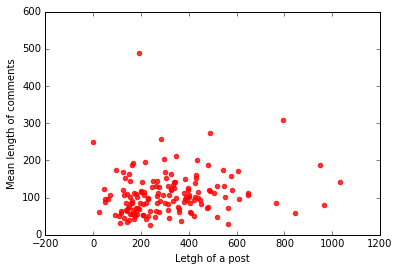

In [17]:
plt.scatter([i for i in len_data], [len_data[i] for i in len_data], color = 'r', alpha = 0.8)
plt.ylabel('Mean length of comments')
plt.xlabel('Letgh of a post')

In [19]:

cities = []
for start in range(0, len(ids)+1, 100):  # будем доставать информацию о 100 юзерах за один запрос
    user_info = vk_api('users.get', user_ids=','.join(str(i) for i in ids[start:start+100]), fields='city', v='5.63')
    cities += [(c["city"]['id'], c["city"]['title']) for c in user_info['response'] if 'city' in c] 
print(cities[:20])

[(23, 'Астрахань'), (3252, 'Portland'), (1, 'Москва'), (273, 'Toronto'), (586, 'Заречный'), (2, 'Санкт-Петербург'), (1661, 'Washington, D.C.'), (314, 'Киев'), (104, 'Омск'), (1904856, 'Basel'), (49, 'Екатеринбург'), (125, 'Саратов'), (2, 'Санкт-Петербург'), (1, 'Москва'), (148, 'Улан-Удэ'), (157, 'Чебоксары'), (23, 'Астрахань'), (1, 'Москва'), (1, 'Москва'), (60, 'Казань')]


In [68]:
datetime.datetime.fromtimestamp(time.mktime(time.strptime('12.09.1950', "%d.%m.%Y")))

OverflowError: mktime argument out of range